# Лабораторная работа - Математический анализ - 1

# Вычислить интеграл

## Разбиение отрезка

In [235]:
import pandas as pd
import numpy as np
import math

import random
from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
from ipywidgets import interactive_output, IntSlider, VBox

In [239]:
# основная функция варианта
def f(x):
    cos_x = (math.cos(x))**2
    return cos_x

# основной отрезок
main_interval = [0, 3.14]

# функция для тестов
# def g(x):
#     return (2 ** (-x)) - (x**2)*(np.log(2))

In [237]:
# функция разбивающая отрезок на n равных частей
def division(interval: list, n: int):

    left = interval[0]
    right = interval[-1]
    fragmentation = []
    step = round( abs(right - left) / n, 4) 

    # разбиение
    while abs(right - left) >= step:
        fragmentation.append([left, round(left+step, 5)])
        left = round(left + step, 5)

    # корректировка правой границы
    if right != left and abs(right - left) > step / 1.2 : fragmentation.append([left, right])
    else: fragmentation[-1][-1] = right
        
    return fragmentation

## Интегральная сумма - Метод прямоугольников

In [238]:
def integral_sum(fragmentation: list, option: str):

    # опции
    if option == "left": # все левые концы
        points = [part[0] for part in fragmentation]
        
    elif option == "right": # все правые концы
        points = [part[1] for part in fragmentation]
        
    elif option == "mid": # все средние точки
        points = [ (part[1] + part[0]) / 2 for part in fragmentation]

    else: # все произвольные точки
        points = [ random.uniform(part[0], part[1]) for part in fragmentation]

    # значения в выбранных точках 
    values_fx = [f(x) for x in points]

    # площадь каждого прямоугольника
    main_sum = [values_fx[i] * abs(fragmentation[i][1] - fragmentation[i][0]) for i in range(len(fragmentation))]

    # итоговая сумма 
    return values_fx, sum(main_sum)

In [241]:
# тест суммы
nums = division(main_interval, 4)
_, integral = integral_sum(nums, "right")
integral

1.569373390935333

## Интегральная сумма - Метод трапеций

In [242]:
def trapezoid_method(fragmentation: list):

    # по формуле
    main_sum = [ ( (f(part[0]) + f(part[1])) * abs(part[1]-part[0]) / 2 ) for part in fragmentation]
    
    return sum(main_sum)

In [243]:
# тест суммы
nums = division(main_interval, 16)
integral = trapezoid_method(nums)
integral

1.5692239289079883

## Интегральная сумма - Метод Симпсона

In [245]:
def simpson_method(fragmentation: list):

    # по предложенной формуле
    main_sum = [ ( (f(part[0]) + 4 * (f((part[0] + part[1]) / 2)) + f(part[1])) * abs(part[1]-part[0]) / 6 ) 
                for part in fragmentation]
    
    return sum(main_sum)

In [246]:
# тест суммы
nums = division(main_interval, 16)
integral = simpson_method(nums)
integral

1.5692036551385289

## Графики

In [247]:
def plot_integration(func, method: str, interval: list, n: int):

    # инициализация
    x_space = np.linspace(interval[0], interval[1], 1000)
    y_space = [func(x) for x in x_space]
    fragmentation = division(interval, n)

    # график для методов опционально
    if method == "sum":
        values, _ = integral_sum(fragmentation, "")

        for (x0, x1), h in zip(fragmentation, values):
            plt.bar(x0, h, width=x1-x0, align='edge', alpha=0.5, edgecolor="red")

    elif method == "trap":
        x_values_trap = [part[0] for part in fragmentation] + [fragmentation[-1][-1]]
        у_values_trap = [func(x) for x in x_values_trap]
        
        plt.plot(x_values_trap, у_values_trap, color="red", linestyle="--")
        plt.fill_between(x_values_trap, у_values_trap, color="red", alpha=0.3)

    else:
        for x0, x1 in fragmentation:
            
            xm = (x0 + x1)/2
            x_parab = [x0, xm, x1]
            y_parab = [f(x0), (f(x0) + 4 * (f((x0 + x1) / 2)) + f(x1))/6, f(x1)]
        
            plt.plot(x_parab, y_parab, color="red", linestyle="--")
            plt.fill_between(x_parab, y_parab, color="red", alpha=0.3)

    # отображение основной функции анализа
    plt.plot(x_space, y_space, color="black", linestyle="-")

    # найстройки
    plt.title("График функции и ее апроксимации")
    plt.xlabel("X")
    plt.ylabel("Y")
    
    plt.grid(True)
    plt.show()

In [248]:
# красивый вывод

n_slider = IntSlider(min=2, max=16, step=1, value=10, description="Разбиений")
out = interactive_output(
    lambda n: plot_integration(f, "trap", [0, 3.14], n),
    {"n": n_slider}
)

VBox([out, n_slider])

In [249]:
# красивый вывод

n_slider = IntSlider(min=2, max=128, step=1, value=10, description="Разбиений")
out = interactive_output(
    lambda n: plot_integration(f, "sum", [0, 3.14], n),
    {"n": n_slider}
)

VBox([out, n_slider])

In [250]:
# красивый вывод
n_slider = IntSlider(min=2, max=128, step=1, value=10, description="Разбиений")
out = interactive_output(
    lambda n: plot_integration(f, "sim", [0, 3.14], n),
    {"n": n_slider}
)

VBox([out, n_slider])

## Анализ отклонений

In [251]:
# инициализация
integral_mae_list = []
trapezoid_mae_list = []
simpson_mae_list = []
true_value = math.pi /2
n_list = [1, 2, 4, 8, 16, 32]

# формирование
for n in n_list:
    fragmentation = division([0, 3.14], n)
    _, integral = integral_sum(fragmentation, "right")
    trapezoid = trapezoid_method(fragmentation)
    simpson = simpson_method(fragmentation)

    integral_mae_list.append(mean_absolute_error([true_value], [integral]))
    trapezoid_mae_list.append(mean_absolute_error([true_value], [trapezoid]))
    simpson_mae_list.append(mean_absolute_error([true_value], [simpson]))

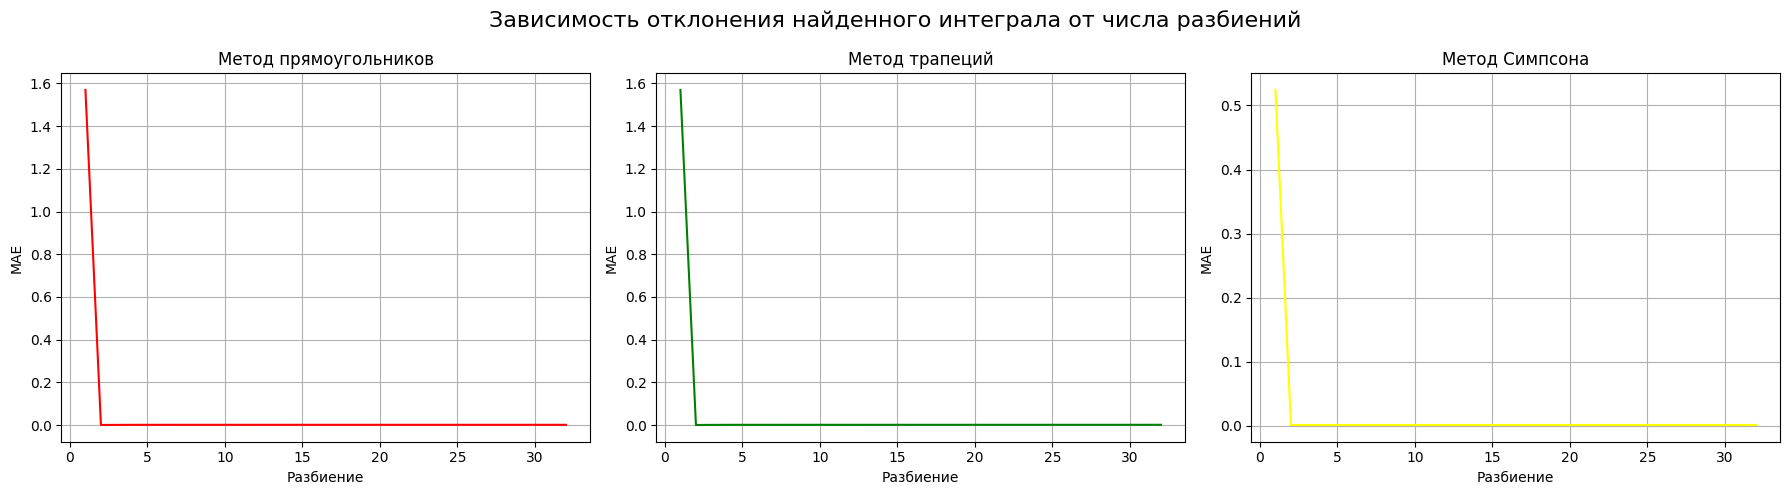

In [252]:
# вывод результатов
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Метод прямоугольников
axes[0].plot(n_list, integral_mae_list, color="red", linestyle="-")
axes[0].set_title("Метод прямоугольников")
axes[0].set_xlabel("Разбиение")
axes[0].set_ylabel("MAE")
axes[0].grid(True)

# Метод трапеций
axes[1].plot(n_list, trapezoid_mae_list, color="green", linestyle="-")
axes[1].set_title("Метод трапеций")
axes[1].set_xlabel("Разбиение")
axes[1].set_ylabel("MAE")
axes[1].grid(True)

# Метод Симпсона
axes[2].plot(n_list, simpson_mae_list, color="yellow", linestyle="-")
axes[2].set_title("Метод Симпсона")
axes[2].set_xlabel("Разбиение")
axes[2].set_ylabel("MAE")
axes[2].grid(True)

fig.suptitle("Зависимость отклонения найденного интеграла от числа разбиений", fontsize=16)
plt.tight_layout()
plt.show()